In [18]:
import numpy as np
from games.blotto import Blotto
from agents.regretmatching import RegretMatching
from agents.fictitiousplay import FictitiousPlay
from agents.random_agent import RandomAgent

In [19]:
g = Blotto(S=6, N=3)

In [20]:
g.reset()

({'agent_0': None, 'agent_1': None}, None)

In [21]:
g._moves

[[1, 1, 4], [1, 2, 3], [2, 2, 2]]

In [22]:
rm = dict(map(lambda agent: (agent, RegretMatching(game=g, agent=agent, seed=1)), g.agents))

In [27]:
for i in range(10000):
    actions = dict(map(lambda agent: (agent, rm[agent].action()), g.agents))
    g.step(actions)

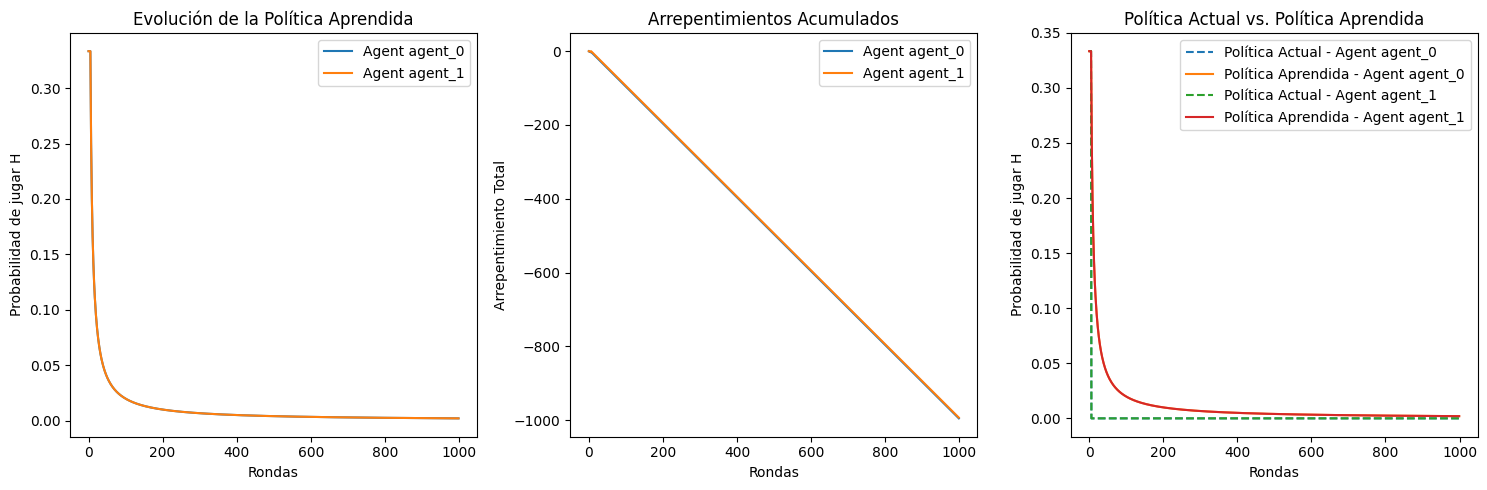

In [26]:
import numpy as np
import matplotlib.pyplot as plt

g = Blotto(S=6, N=3)
g.reset()  
rm = dict(map(lambda agent: (agent, RegretMatching(game=g, agent=agent, seed=1)), g.agents))

# Número de rondas que queremos jugar
num_rounds = 1000

# Listas para almacenar los registros
strategy_evolution_rm = {agent: [] for agent in g.agents}
cum_regrets_evolution = {agent: [] for agent in g.agents}
curr_policy_evolution = {agent: [] for agent in g.agents}

# Ejecutar el juego
for _ in range(num_rounds):
    actions = dict(map(lambda agent: (agent, rm[agent].action()), g.agents))
    g.step(actions)
    
    for agent in g.agents:
        # Registramos la política aprendida, los arrepentimientos acumulados y la política actual
        strategy_evolution_rm[agent].append(rm[agent].policy()[0])
        cum_regrets_evolution[agent].append(sum(rm[agent].cum_regrets))
        curr_policy_evolution[agent].append(rm[agent].curr_policy[0])

# Visualización
plt.figure(figsize=(15, 5))

# Gráfico de la evolución de la política aprendida
plt.subplot(1, 3, 1)
for agent in g.agents:
    plt.plot(strategy_evolution_rm[agent], label=f'Agent {agent}')
plt.title('Evolución de la Política Aprendida')
plt.xlabel('Rondas')
plt.ylabel('Probabilidad de jugar H')
plt.legend()

# Gráfico de los arrepentimientos acumulados
plt.subplot(1, 3, 2)
for agent in g.agents:
    plt.plot(cum_regrets_evolution[agent], label=f'Agent {agent}')
plt.title('Arrepentimientos Acumulados')
plt.xlabel('Rondas')
plt.ylabel('Arrepentimiento Total')
plt.legend()

# Gráfico de la política actual vs. la política aprendida
plt.subplot(1, 3, 3)
for agent in g.agents:
    plt.plot(curr_policy_evolution[agent], label=f'Política Actual - Agent {agent}', linestyle='--')
    plt.plot(strategy_evolution_rm[agent], label=f'Política Aprendida - Agent {agent}')
plt.title('Política Actual vs. Política Aprendida')
plt.xlabel('Rondas')
plt.ylabel('Probabilidad de jugar H')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
dict(map(lambda agent: (agent, g._moves[np.argmax(rm[agent].policy())]), g.agents))

{'agent_0': [2, 2, 2], 'agent_1': [2, 2, 2]}

In [8]:
agent_classes = [ RegretMatching, RandomAgent ]
my_agents = {}
g.reset()
for i, agent in enumerate(g.agents):
    my_agents[agent] = agent_classes[i](game=g, agent=agent)


In [9]:
for i in range(10000):
    actions = dict(map(lambda agent: (agent, my_agents[agent].action()), g.agents))
    g.step(actions)

In [10]:
dict(map(lambda agent: (agent, g._moves[np.argmax(my_agents[agent].policy())]), g.agents))

{'agent_0': [2, 2, 2], 'agent_1': [1, 1, 4]}

In [11]:
g.reset()

({'agent_0': None, 'agent_1': None}, None)

In [12]:
fp = dict(map(lambda agent: (agent, FictitiousPlay(game=g, agent=agent, seed=1)), g.agents))

In [13]:
for i in range(10000):
    actions = dict(map(lambda agent: (agent, fp[agent].action()), g.agents))
    g.step(actions)

In [14]:
dict(map(lambda agent: (agent, g._moves[np.argmax(fp[agent].policy())]), g.agents))

{'agent_0': [2, 2, 2], 'agent_1': [2, 2, 2]}

In [15]:
agent_classes = [ FictitiousPlay, RandomAgent ]
my_agents = {}
g.reset()
for i, agent in enumerate(g.agents):
    my_agents[agent] = agent_classes[i](game=g, agent=agent)


In [16]:
for i in range(10000):
    actions = dict(map(lambda agent: (agent, my_agents[agent].action()), g.agents))
    g.step(actions)

In [17]:
dict(map(lambda agent: (agent, g._moves[np.argmax(my_agents[agent].policy())]), g.agents))

{'agent_0': [2, 2, 2], 'agent_1': [1, 1, 4]}